In [7]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
%matplotlib inline

In [8]:
df = pd.read_csv(r'C:\Users\moonl\OneDrive\Desktop\AFI_dataset.csv')

In [9]:
df.head()

,Sex,Age,Tribe,No. of people Household,Residence District,Residence SubCounty,Residence Parish,Residence LC1,BaselineTemperature,Baseline Fever,...,LeptoIgMFup,BrucellaIgGFup,TyphoidTubex_1,DengueNS1,ChikungunyaIgM_1,WNVFocusIgM,RickettsiaIgG_1,Rickettsii_gp1,Typhi_gp1,Rickettsii_endpt1
0,1. Male,49,MUNYANKOLE,10,KASESE,KASESE CENTRAL DIVISION,KAMAIBA,KILEMBE QUARTERS,37.8,Yes,...,5-Negative,5-Negative,1-Negative 1+,2-Negative,2-Negative,2-Negative,1-Positive,2.0,1.0,6-Not applicable
1,2. Female,5,LUGBARA,.,ARUA,ADUMI,OMBACI,BARIZE,38.7,Yes,...,5-Negative,5-Negative,NaN,2-Negative,1-Positive,2-Negative,2-Negative,2.0,2.0,6-Not applicable
2,2. Female,38,OMUHIRA,5,KASESE,KITSWAMBA,HIMA,NYANGEREKA,34.3,Yes,...,5-Negative,5-Negative,1-Negative 1+,2-Negative,2-Negative,2-Negative,1-Positive,1.0,2.0,4-=256
3,2. Female,27,LUGBARA,5,ARUA,ADUMI,ANYARA,ODRANYIRI,36.5,Yes,...,5-Negative,5-Negative,1-Negative 1+,2-Negative,1-Positive,2-Negative,2-Negative,2.0,2.0,6-Not applicable
4,2. Female,42,MUNYANKOLE,8,KASESE,KARUSANDARA,KAWAMBA,NGANDO,38,Yes,...,5-Negative,5-Negative,1-Negative 1+,2-Negative,2-Negative,2-Negative,1-Positive,1.0,1.0,4-=256


In [10]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Columns: 237 entries, Sex to Rickettsii_endpt1
dtypes: float64(4), int64(1), object(232)
memory usage: 2.3+ MB


In [11]:
#checking size
df.shape

(1281, 237)

In [12]:
df.isna().sum()

Sex                          0
Age                          0
Tribe                        0
No. of people Household      0
Residence District           0
                          ... 
WNVFocusIgM                252
RickettsiaIgG_1            809
Rickettsii_gp1             809
Typhi_gp1                  809
Rickettsii_endpt1          809
Length: 237, dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.dtypes

Sex                         object
Age                          int64
Tribe                       object
No. of people Household     object
Residence District          object
                            ...   
WNVFocusIgM                 object
RickettsiaIgG_1             object
Rickettsii_gp1             float64
Typhi_gp1                  float64
Rickettsii_endpt1           object
Length: 237, dtype: object

In [15]:
df.describe()

,Age,Bloodslidethick,ParasiteNo,Rickettsii_gp1,Typhi_gp1
count,1281.000000,0.0,0.0,472.000000,472.000000
mean,20.844653,NaN,NaN,1.646186,1.940678
std,15.416815,NaN,NaN,0.478660,0.236477
min,2.000000,NaN,NaN,1.000000,1.000000
25%,7.000000,NaN,NaN,1.000000,2.000000
50%,18.000000,NaN,NaN,2.000000,2.000000
75%,30.000000,NaN,NaN,2.000000,2.000000
max,93.000000,NaN,NaN,2.000000,2.000000


In [17]:
heads='Sex,Age,Tribe,No. of people Household,Residence District,Residence SubCounty,Residence Parish,Residence LC1,BaselineTemperature,Baseline Fever,Baseline FeverDuration,Baseline Chills,Baseline Headache,Baseline NeckPain,Baseline abdominal pain,Baseline Constipation,Baseline Diarrhea,Baseline Nausea,Baseline Vomiting,Baseline Coughing blood,Baseline Hemorrhage Gums,Baseline HemorrhageNose,Baseline Hemorrhage vaginal,BaselineHemorrhageOther,BaselineBloodystool,BaselineBloodyurine,BaselineRedeyes,BasselineYelloweyes,BaselineEyepain,BaselineMusclePain,BaselineJointPain,BaselineBackpain,BaselineAnorexia,EscharYesNo,NumEschars,EscharPalms,EscharSoles,EscharTrunk,EscharFace,EscharFeet,EscharHands,EscharOther,EscharUnknown,EscharArms,EscharLegs,RashYesNo,RashPalms,RashSoles,RashTrunk,RashFace,RashFeet,RashHands,RashOther,RashUnknown,RashArms,RashLegs,Petechial,Pustular,Maculopapular,TypeRashOther,Feverbeforerash,Numdaysfeverrash,RashFirstPalms,RashFirstSoles,RashFirstTrunk,RashFirstFace,RashFirstFeet,RashFirstHands,RashFirstOther,RashFirstUnknown,RashFirstArms,RashFirstLegs,EctoparasitesYesNo,Lice,Fleas,Ticks,Bitingflies,Mosquitos,EctoparasitesOther,EctoparasitesUnknown,ClinicalDiagnosis,MedicationYesNo,TypeMedication,BaslineMedicationStartdate,BaslineMedicationDatelastdose,GaveMedication,GaveMedicationOtherDesc,Cotrimoxazole,Ciprofloxacin,Amoxicillin,Doxycycline,AntibioticsOther,ArtemetherLumefantrine,ArtesunateAmodiaquine,ArtesunateMefloquine,ArtesunateSulfadosinePyrimetham,AmodiaquineSulfadosinePyrimetha,ChloroquineSulfadosinePyrimetha,SulfadoxinePyrimethamine,Quinine,AntimalarialsOther,OthertreatmentYesNo,OtherTreatmentDesc,Height,Pipedwelling,Pipedcompound,Publictap,Openwellyard,Openpublicwell,Bottledwater,Protectedwell,Surfacewater,Rainwater,TreatwaterYesNo,TreatmentWaterType,UseSoapYesNo,IntoWaterYesNo,IntoFreshwaterSpring,IntoStandingwater,IntoRainwater,IntoMovingwater,IntoPublicFountain,IntoWaterOther,StandingWaterCompound,CutsScratches,Addmudhouse,RoofType,RoofOther,FlushToilet,VIPLatrine,Coveredpitwithslab,Coveredpitnoslab,ToiletOther,Uncoveredpitwithslab,Uncoveredpitlatrinewithoutslab,Nofacility,SprayWalls,MonthsSprayed,BeddingType,BeddingOtherDesc,ElevatedBed,MosquitoNet,NetTuckBed,MosquitoNetType,NetOther,NetTreatedMonths,NetRips,RipsUnknownDesc,AnimalsDied,AnimalsAbort,DeliveryAnimals,ButcherCattle,ButcherGoats,ButcherPigs,ButcherSheep,ButcherDogs,ButcherOther,HuntForesthog,HuntWildrodents,HuntWaterbuck,HuntKob,HuntWildOther,RodentsCompound,RodentsKitchen,RodentsFields,RodentsMoreUsual,SeenTicks,TicksPatient,TicksFamilymember,TicksAnimalsowned,AgriculturalWork,WoodsWork,Farmer,Artisan,Housewife,Healthcareworker,Officeworker,Student,Merchant,Unemployed,ProfessionOther,TreatmentInstructed,FollowupTreatmentResponse,FollowUpTemperature,FollowupFever,FollowupFeverDuration,FollowupChills,FollowupHeadache,FollowupNeckpain,FollowupAbdominalPain,FollowupConstipation,FollowupDiarrhea,FollowupNausea,FollowupVomiting,FollowupCoughingblood,FollowupBloodystools,FollowupBloodyUrine,FollowupSkinrash,FollowupRedeyes,FollowupYelloweyes,FollowupEyepain,FollowupMusclepain,FollowupJointpain,FollowupBackpain,FollowupAnorexia,FollowupSymptomsOther,FollowupHemorrhage,FollowupHemorrhageGums,FollowupHemorrhageNose,FollowupHemorrhageVaginal,FollowupHemorrhageOther,FollowupDiagnosisChange,FollowupClinicalDiagnosis,FollowupAntimicrobials,FollowupAntimicrobialsDesc,FollowupAntimalarials,FollowupAntimalarialDesc,FollowupOtherTreatment,FollowupOtherTreatmentDesc,NameOfHealthfacility,Malaria RDT Results,LeptoIgMresults,BrucellaIgM,BrucellaIgG,Bloodslidethick,TyphTubexClinic,ParasiteNo,LeptoIgMFup,BrucellaIgGFup,TyphoidTubex_1,DengueNS1,ChikungunyaIgM_1,WNVFocusIgM,RickettsiaIgG_1,Rickettsii_gp1,Typhi_gp1,Rickettsii_endpt1,'

cols=heads.split(',')
cols 

['Sex',
 'Age',
 'Tribe',
 'No. of people Household',
 'Residence District',
 'Residence SubCounty',
 'Residence Parish',
 'Residence LC1',
 'BaselineTemperature',
 'Baseline Fever',
 'Baseline FeverDuration',
 'Baseline Chills',
 'Baseline Headache',
 'Baseline NeckPain',
 'Baseline abdominal pain',
 'Baseline Constipation',
 'Baseline Diarrhea',
 'Baseline Nausea',
 'Baseline Vomiting',
 'Baseline Coughing blood',
 'Baseline Hemorrhage Gums',
 'Baseline HemorrhageNose',
 'Baseline Hemorrhage vaginal',
 'BaselineHemorrhageOther',
 'BaselineBloodystool',
 'BaselineBloodyurine',
 'BaselineRedeyes',
 'BasselineYelloweyes',
 'BaselineEyepain',
 'BaselineMusclePain',
 'BaselineJointPain',
 'BaselineBackpain',
 'BaselineAnorexia',
 'EscharYesNo',
 'NumEschars',
 'EscharPalms',
 'EscharSoles',
 'EscharTrunk',
 'EscharFace',
 'EscharFeet',
 'EscharHands',
 'EscharOther',
 'EscharUnknown',
 'EscharArms',
 'EscharLegs',
 'RashYesNo',
 'RashPalms',
 'RashSoles',
 'RashTrunk',
 'RashFace',
 'Rash

<AxesSubplot:>

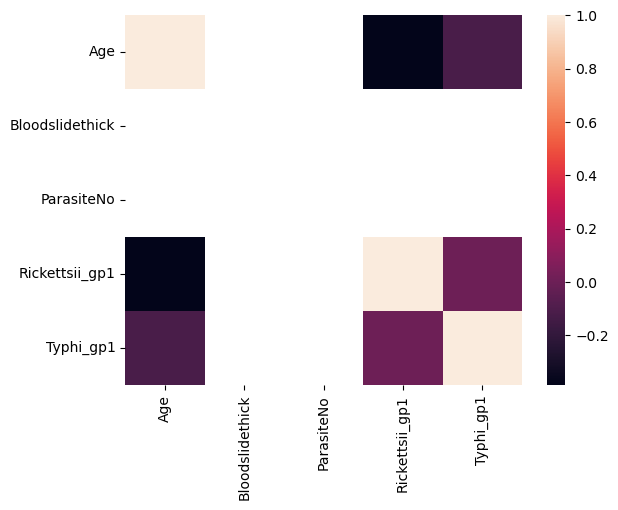

In [18]:
tc=df.corr()
sn.heatmap(tc)

<AxesSubplot:>

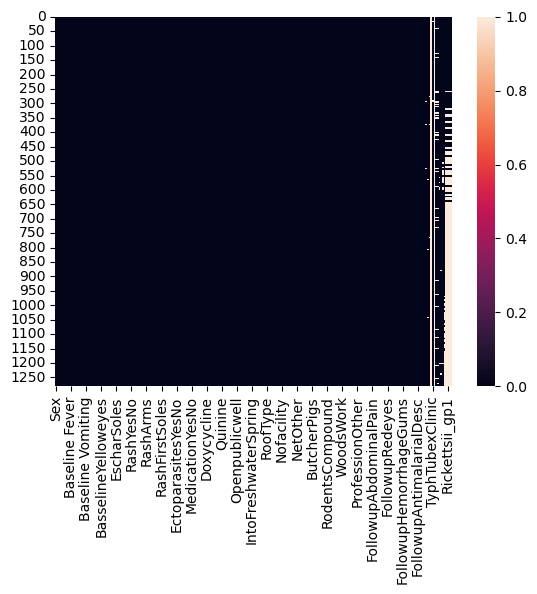

In [19]:
sn.heatmap(df.isna())

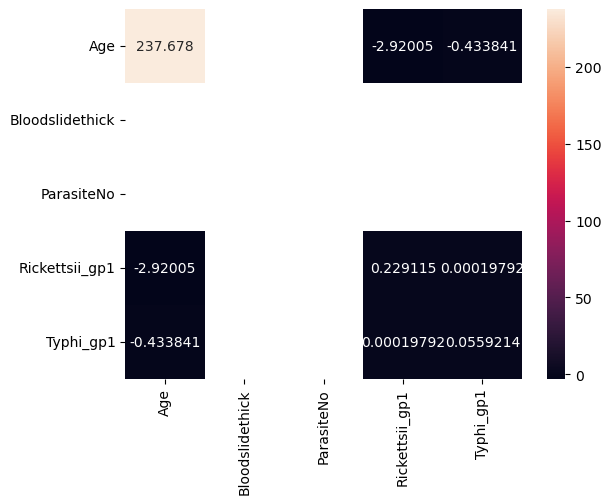

In [20]:
cov_mat =pd.DataFrame.cov(df)
sn.heatmap(cov_mat, annot=True, fmt='g')
plt.show()

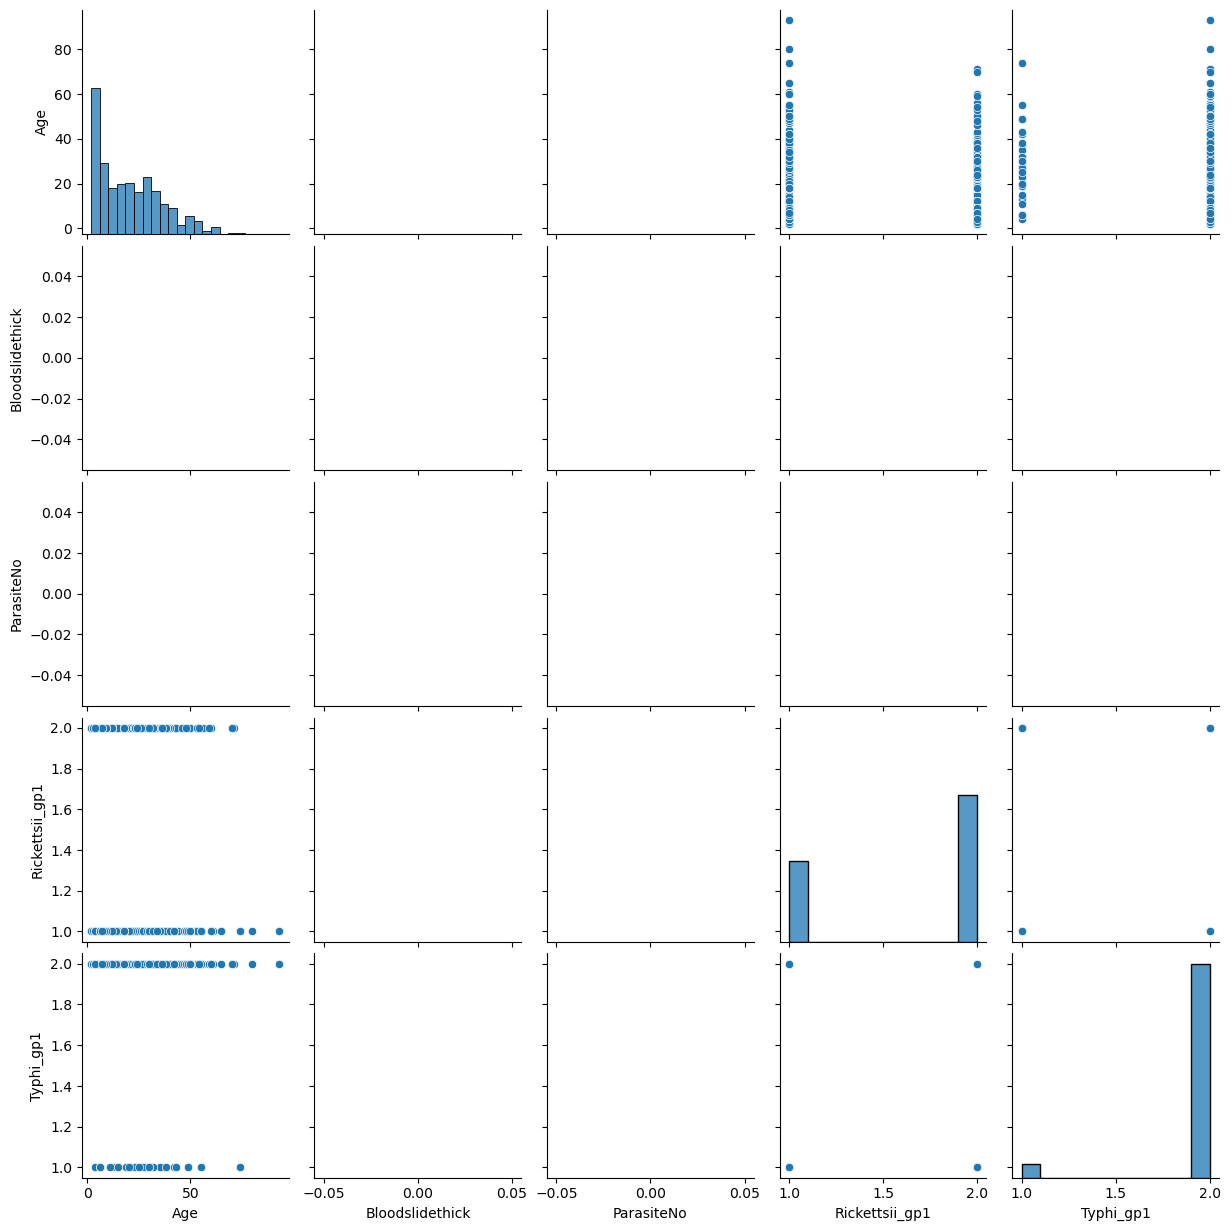

In [21]:
sn.pairplot(df)

In [22]:
def yn(df):
    df = df.replace({'No': 0, 'Yes': 1, 'Missing': -1, 'null': -1,'missing':-1,'Unknown':-1,'UNKNOWN':-1})
    return df

In [23]:
for i in cols:
    print(df[i].value_counts())

2. Female    717
1. Male      564
Name: Sex, dtype: int64
4     69
5     68
6     65
3     64
18    62
      ..
65     1
57     1
74     1
71     1
73     1
Name: Age, Length: 69, dtype: int64
LUGBARA        448
MUKONJO        342
MUGANDA        284
MUNYANKOLE      51
MUTOORO         36
MUNYARWANDA     23
MUSOGA          20
Missing         14
MUNYORO          9
MUKIGA           7
MUGISU           5
MURUNDI          4
ITESO            4
MUFUMBIRA        4
MUGWERE          3
MUTANZANIA       2
MUSAMYA          2
MUNYOLE          2
ITESOT           2
LANGI            2
MUNYABINDI       2
MUZIBA           1
ZANDE            1
MUKYOTARA        1
ACHOLI           1
MUSONGOLLA       1
MUKONZO          1
MUTUKU           1
MUNUBBI          1
MADI             1
ODUNYAI          1
SABINI           1
KATI             1
ANYARA           1
OMUHIRA          1
MWAMBA           1
Name: Tribe, dtype: int64
4     201
5     191
6     161
7     142
3     129
8     114
.      73
10     66
2      51
9      

KeyError: ''

In [24]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import isnull, when, count, col
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [25]:
sc = SparkContext.getOrCreate()
spark = SparkSession(sc) 

In [26]:
print(spark.version)

3.5.0


In [35]:
dataf=spark.read.format("csv").option("header", "false").option("inferschema","True").load(r'C:\Users\moonl\OneDrive\Desktop\AFI_dataset.csv')

In [40]:
column_names = ['Sex','Age','Tribe',
 'No. of people Household',
 'Residence District',
 'Residence SubCounty',
 'Residence Parish',
 'Residence LC1',
 'BaselineTemperature',
 'Baseline Fever',
 'Baseline FeverDuration',
 'Baseline Chills',
 'Baseline Headache',
 'Baseline NeckPain',
 'Baseline abdominal pain',
 'Baseline Constipation',
 'Baseline Diarrhea',
 'Baseline Nausea',
 'Baseline Vomiting',
 'Baseline Coughing blood',
 'Baseline Hemorrhage Gums',
 'Baseline HemorrhageNose',
 'Baseline Hemorrhage vaginal',
 'BaselineHemorrhageOther',
 'BaselineBloodystool',
 'BaselineBloodyurine',
 'BaselineRedeyes',
 'BasselineYelloweyes',
 'BaselineEyepain',
 'BaselineMusclePain',
 'BaselineJointPain',
 'BaselineBackpain',
 'BaselineAnorexia',
 'EscharYesNo',
 'NumEschars',
 'EscharPalms',
 'EscharSoles',
 'EscharTrunk',
 'EscharFace',
 'EscharFeet',
 'EscharHands',
 'EscharOther',
 'EscharUnknown',
 'EscharArms',
 'EscharLegs',
 'RashYesNo',
 'RashPalms',
 'RashSoles',
 'RashTrunk',
 'RashFace',
 'RashFeet',
 'RashHands',
 'RashOther',
 'RashUnknown',
 'RashArms',
 'RashLegs',
 'Petechial',
 'Pustular',
 'Maculopapular',
 'TypeRashOther',
 'Feverbeforerash',
 'Numdaysfeverrash',
 'RashFirstPalms',
 'RashFirstSoles',
 'RashFirstTrunk',
 'RashFirstFace',
 'RashFirstFeet',
 'RashFirstHands',
 'RashFirstOther',
 'RashFirstUnknown',
 'RashFirstArms',
 'RashFirstLegs',
 'EctoparasitesYesNo',
 'Lice',
 'Fleas',
 'Ticks',
 'Bitingflies',
 'Mosquitos',
 'EctoparasitesOther',
 'EctoparasitesUnknown',
 'ClinicalDiagnosis',
 'MedicationYesNo',
 'TypeMedication',
 'BaslineMedicationStartdate',
 'BaslineMedicationDatelastdose',
 'GaveMedication',
 'GaveMedicationOtherDesc',
 'Cotrimoxazole',
 'Ciprofloxacin',
 'Amoxicillin',
 'Doxycycline',
 'AntibioticsOther',
 'ArtemetherLumefantrine',
 'ArtesunateAmodiaquine',
 'ArtesunateMefloquine',
 'ArtesunateSulfadosinePyrimetham',
 'AmodiaquineSulfadosinePyrimetha',
 'ChloroquineSulfadosinePyrimetha',
 'SulfadoxinePyrimethamine',
 'Quinine',
 'AntimalarialsOther',
 'OthertreatmentYesNo',
 'OtherTreatmentDesc',
 'Height',
 'Pipedwelling',
 'Pipedcompound',
 'Publictap',
 'Openwellyard',
 'Openpublicwell',
 'Bottledwater',
 'Protectedwell',
 'Surfacewater',
 'Rainwater',
 'TreatwaterYesNo',
 'TreatmentWaterType',
 'UseSoapYesNo',
 'IntoWaterYesNo',
 'IntoFreshwaterSpring',
 'IntoStandingwater',
 'IntoRainwater',
 'IntoMovingwater',
 'IntoPublicFountain',
 'IntoWaterOther',
 'StandingWaterCompound',
 'CutsScratches',
 'Addmudhouse',
 'RoofType',
 'RoofOther',
 'FlushToilet',
 'VIPLatrine',
 'Coveredpitwithslab',
 'Coveredpitnoslab',
 'ToiletOther',
 'Uncoveredpitwithslab',
 'Uncoveredpitlatrinewithoutslab',
 'Nofacility',
 'SprayWalls',
 'MonthsSprayed',
 'BeddingType',
 'BeddingOtherDesc',
 'ElevatedBed',
 'MosquitoNet',
 'NetTuckBed',
 'MosquitoNetType',
 'NetOther',
 'NetTreatedMonths',
 'NetRips',
 'RipsUnknownDesc',
 'AnimalsDied',
 'AnimalsAbort',
 'DeliveryAnimals',
 'ButcherCattle',
 'ButcherGoats',
 'ButcherPigs',
 'ButcherSheep',
 'ButcherDogs',
 'ButcherOther',
 'HuntForesthog',
 'HuntWildrodents',
 'HuntWaterbuck',
 'HuntKob',
 'HuntWildOther',
 'RodentsCompound',
 'RodentsKitchen',
 'RodentsFields',
 'RodentsMoreUsual',
 'SeenTicks',
 'TicksPatient',
 'TicksFamilymember',
 'TicksAnimalsowned',
 'AgriculturalWork',
 'WoodsWork',
 'Farmer',
 'Artisan',
 'Housewife',
 'Healthcareworker',
 'Officeworker',
 'Student',
 'Merchant',
 'Unemployed',
 'ProfessionOther',
 'TreatmentInstructed',
 'FollowupTreatmentResponse',
 'FollowUpTemperature',
 'FollowupFever',
 'FollowupFeverDuration',
 'FollowupChills',
 'FollowupHeadache',
 'FollowupNeckpain',
 'FollowupAbdominalPain',
 'FollowupConstipation',
 'FollowupDiarrhea',
 'FollowupNausea',
 'FollowupVomiting',
 'FollowupCoughingblood',
 'FollowupBloodystools',
 'FollowupBloodyUrine',
 'FollowupSkinrash',
 'FollowupRedeyes',
 'FollowupYelloweyes',
 'FollowupEyepain',
 'FollowupMusclepain',
 'FollowupJointpain',
 'FollowupBackpain',
 'FollowupAnorexia',
 'FollowupSymptomsOther',
 'FollowupHemorrhage',
 'FollowupHemorrhageGums',
 'FollowupHemorrhageNose',
 'FollowupHemorrhageVaginal',
 'FollowupHemorrhageOther',
 'FollowupDiagnosisChange',
 'FollowupClinicalDiagnosis',
 'FollowupAntimicrobials',
 'FollowupAntimicrobialsDesc',
 'FollowupAntimalarials',
 'FollowupAntimalarialDesc',
 'FollowupOtherTreatment',
 'FollowupOtherTreatmentDesc',
 'NameOfHealthfacility',
 'Malaria RDT Results',
 'LeptoIgMresults',
 'BrucellaIgM',
 'BrucellaIgG',
 'Bloodslidethick',
 'TyphTubexClinic',
 'ParasiteNo',
 'LeptoIgMFup',
 'BrucellaIgGFup',
 'TyphoidTubex_1',
 'DengueNS1',
 'ChikungunyaIgM_1',
 'WNVFocusIgM',
 'RickettsiaIgG_1',
 'Rickettsii_gp1',
 'Typhi_gp1',
 'Rickettsii_endpt1']

for new_col, old_col in zip(column_names, dataf.columns):
    dataf = dataf.withColumnRenamed(old_col, new_col)

In [42]:
#from pyspark.sql.functions import isnull, when, count, col

#dataf.select([count(when(isnull(c), c)).alias(c) for c in dataf.columns]).show()

In [44]:
#dataf = dataf.na.drop()

In [45]:
dataf.printSchema()

root
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Tribe: string (nullable = true)
 |-- No. of people Household: string (nullable = true)
 |-- Residence District: string (nullable = true)
 |-- Residence SubCounty: string (nullable = true)
 |-- Residence Parish: string (nullable = true)
 |-- Residence LC1: string (nullable = true)
 |-- BaselineTemperature: string (nullable = true)
 |-- Baseline Fever: string (nullable = true)
 |-- Baseline FeverDuration: string (nullable = true)
 |-- Baseline Chills: string (nullable = true)
 |-- Baseline Headache: string (nullable = true)
 |-- Baseline NeckPain: string (nullable = true)
 |-- Baseline abdominal pain: string (nullable = true)
 |-- Baseline Constipation: string (nullable = true)
 |-- Baseline Diarrhea: string (nullable = true)
 |-- Baseline Nausea: string (nullable = true)
 |-- Baseline Vomiting: string (nullable = true)
 |-- Baseline Coughing blood: string (nullable = true)
 |-- Baseline Hemorrhage Gums: stri

In [46]:
dataf.show

<bound method DataFrame.show of DataFrame[Sex: string, Age: string, Tribe: string, No. of people Household: string, Residence District: string, Residence SubCounty: string, Residence Parish: string, Residence LC1: string, BaselineTemperature: string, Baseline Fever: string, Baseline FeverDuration: string, Baseline Chills: string, Baseline Headache: string, Baseline NeckPain: string, Baseline abdominal pain: string, Baseline Constipation: string, Baseline Diarrhea: string, Baseline Nausea: string, Baseline Vomiting: string, Baseline Coughing blood: string, Baseline Hemorrhage Gums: string, Baseline HemorrhageNose: string, Baseline Hemorrhage vaginal: string, BaselineHemorrhageOther: string, BaselineBloodystool: string, BaselineBloodyurine: string, BaselineRedeyes: string, BasselineYelloweyes: string, BaselineEyepain: string, BaselineMusclePain: string, BaselineJointPain: string, BaselineBackpain: string, BaselineAnorexia: string, EscharYesNo: string, NumEschars: string, EscharPalms: str

In [48]:
indexers = StringIndexer(inputCols = column_names,
                         
                         outputCols =['Sex_indexed',
 'Age_indexed',
 'Tribe_indexed',
 'No. of people Household_indexed',
 'Residence District_indexed',
 'Residence SubCounty_indexed',
 'Residence Parish_indexed',
 'Residence LC1_indexed',
 'BaselineTemperature_indexed',
 'Baseline Fever_indexed',
 'Baseline FeverDuration_indexed',
 'Baseline Chills_indexed',
 'Baseline Headache_indexed',
 'Baseline NeckPain_indexed',
 'Baseline abdominal pain_indexed',
 'Baseline Constipation_indexed',
 'Baseline Diarrhea_indexed',
 'Baseline Nausea_indexed',
 'Baseline Vomiting_indexed',
 'Baseline Coughing blood_indexed',
 'Baseline Hemorrhage Gums_indexed',
 'Baseline HemorrhageNose_indexed',
 'Baseline Hemorrhage vaginal_indexed',
 'BaselineHemorrhageOther_indexed',
 'BaselineBloodystool_indexed',
 'BaselineBloodyurine_indexed',
 'BaselineRedeyes_indexed',
 'BasselineYelloweyes_indexed',
 'BaselineEyepain_indexed',
 'BaselineMusclePain_indexed',
 'BaselineJointPain_indexed',
 'BaselineBackpain_indexed',
 'BaselineAnorexia_indexed',
 'EscharYesNo_indexed',
 'NumEschars_indexed',
 'EscharPalms_indexed',
 'EscharSoles_indexed',
 'EscharTrunk_indexed',
 'EscharFace_indexed',
 'EscharFeet_indexed',
 'EscharHands_indexed',
 'EscharOther_indexed',
 'EscharUnknown_indexed',
 'EscharArms_indexed',
 'EscharLegs_indexed',
 'RashYesNo_indexed',
 'RashPalms_indexed',
 'RashSoles_indexed',
 'RashTrunk_indexed',
 'RashFace_indexed',
 'RashFeet_indexed',
 'RashHands_indexed',
 'RashOther_indexed',
 'RashUnknown_indexed',
 'RashArms_indexed',
 'RashLegs_indexed',
 'Petechial_indexed',
 'Pustular_indexed',
 'Maculopapular_indexed',
 'TypeRashOther_indexed',
 'Feverbeforerash_indexed',
 'Numdaysfeverrash_indexed',
 'RashFirstPalms_indexed',
 'RashFirstSoles_indexed',
 'RashFirstTrunk_indexed',
 'RashFirstFace_indexed',
 'RashFirstFeet_indexed',
 'RashFirstHands_indexed',
 'RashFirstOther_indexed',
 'RashFirstUnknown_indexed',
 'RashFirstArms_indexed',
 'RashFirstLegs_indexed',
 'EctoparasitesYesNo_indexed',
 'Lice_indexed',
 'Fleas_indexed',
 'Ticks_indexed',
 'Bitingflies_indexed',
 'Mosquitos_indexed',
 'EctoparasitesOther_indexed',
 'EctoparasitesUnknown_indexed',
 'ClinicalDiagnosis_indexed',
 'MedicationYesNo_indexed',
 'TypeMedication_indexed',
 'BaslineMedicationStartdate_indexed',
 'BaslineMedicationDatelastdose_indexed',
 'GaveMedication_indexed',
 'GaveMedicationOtherDesc_indexed',
 'Cotrimoxazole_indexed',
 'Ciprofloxacin_indexed',
 'Amoxicillin_indexed',
 'Doxycycline_indexed',
 'AntibioticsOther_indexed',
 'ArtemetherLumefantrine_indexed',
 'ArtesunateAmodiaquine_indexed',
 'ArtesunateMefloquine_indexed',
 'ArtesunateSulfadosinePyrimetham_indexed',
 'AmodiaquineSulfadosinePyrimetha_indexed',
 'ChloroquineSulfadosinePyrimetha_indexed',
 'SulfadoxinePyrimethamine_indexed',
 'Quinine_indexed',
 'AntimalarialsOther_indexed',
 'OthertreatmentYesNo_indexed',
 'OtherTreatmentDesc_indexed',
 'Height_indexed',
 'Pipedwelling_indexed',
 'Pipedcompound_indexed',
 'Publictap_indexed',
 'Openwellyard_indexed',
 'Openpublicwell_indexed',
 'Bottledwater_indexed',
 'Protectedwell_indexed',
 'Surfacewater_indexed',
 'Rainwater_indexed',
 'TreatwaterYesNo_indexed',
 'TreatmentWaterType_indexed',
 'UseSoapYesNo_indexed',
 'IntoWaterYesNo_indexed',
 'IntoFreshwaterSpring_indexed',
 'IntoStandingwater_indexed',
 'IntoRainwater_indexed',
 'IntoMovingwater_indexed',
 'IntoPublicFountain_indexed',
 'IntoWaterOther_indexed',
 'StandingWaterCompound_indexed',
 'CutsScratches_indexed',
 'Addmudhouse_indexed',
 'RoofType_indexed',
 'RoofOther_indexed',
 'FlushToilet_indexed',
 'VIPLatrine_indexed',
 'Coveredpitwithslab_indexed',
 'Coveredpitnoslab_indexed',
 'ToiletOther_indexed',
 'Uncoveredpitwithslab_indexed',
 'Uncoveredpitlatrinewithoutslab_indexed',
 'Nofacility_indexed',
 'SprayWalls_indexed',
 'MonthsSprayed_indexed',
 'BeddingType_indexed',
 'BeddingOtherDesc_indexed',
 'ElevatedBed_indexed',
 'MosquitoNet_indexed',
 'NetTuckBed_indexed',
 'MosquitoNetType_indexed',
 'NetOther_indexed',
 'NetTreatedMonths_indexed',
 'NetRips_indexed',
 'RipsUnknownDesc_indexed',
 'AnimalsDied_indexed',
 'AnimalsAbort_indexed',
 'DeliveryAnimals_indexed',
 'ButcherCattle_indexed',
 'ButcherGoats_indexed',
 'ButcherPigs_indexed',
 'ButcherSheep_indexed',
 'ButcherDogs_indexed',
 'ButcherOther_indexed',
 'HuntForesthog_indexed',
 'HuntWildrodents_indexed',
 'HuntWaterbuck_indexed',
 'HuntKob_indexed',
 'HuntWildOther_indexed',
 'RodentsCompound_indexed',
 'RodentsKitchen_indexed',
 'RodentsFields_indexed',
 'RodentsMoreUsual_indexed',
 'SeenTicks_indexed',
 'TicksPatient_indexed',
 'TicksFamilymember_indexed',
 'TicksAnimalsowned_indexed',
 'AgriculturalWork_indexed',
 'WoodsWork_indexed',
 'Farmer_indexed',
 'Artisan_indexed',
 'Housewife_indexed',
 'Healthcareworker_indexed',
 'Officeworker_indexed',
 'Student_indexed',
 'Merchant_indexed',
 'Unemployed_indexed',
 'ProfessionOther_indexed',
 'TreatmentInstructed_indexed',
 'FollowupTreatmentResponse_indexed',
 'FollowUpTemperature_indexed',
 'FollowupFever_indexed',
 'FollowupFeverDuration_indexed',
 'FollowupChills_indexed',
 'FollowupHeadache_indexed',
 'FollowupNeckpain_indexed',
 'FollowupAbdominalPain_indexed',
 'FollowupConstipation_indexed',
 'FollowupDiarrhea_indexed',
 'FollowupNausea_indexed',
 'FollowupVomiting_indexed',
 'FollowupCoughingblood_indexed',
 'FollowupBloodystools_indexed',
 'FollowupBloodyUrine_indexed',
 'FollowupSkinrash_indexed',
 'FollowupRedeyes_indexed',
 'FollowupYelloweyes_indexed',
 'FollowupEyepain_indexed',
 'FollowupMusclepain_indexed',
 'FollowupJointpain_indexed',
 'FollowupBackpain_indexed',
 'FollowupAnorexia_indexed',
 'FollowupSymptomsOther_indexed',
 'FollowupHemorrhage_indexed',
 'FollowupHemorrhageGums_indexed',
 'FollowupHemorrhageNose_indexed',
 'FollowupHemorrhageVaginal_indexed',
 'FollowupHemorrhageOther_indexed',
 'FollowupDiagnosisChange_indexed',
 'FollowupClinicalDiagnosis_indexed',
 'FollowupAntimicrobials_indexed',
 'FollowupAntimicrobialsDesc_indexed',
 'FollowupAntimalarials_indexed',
 'FollowupAntimalarialDesc_indexed',
 'FollowupOtherTreatment_indexed',
 'FollowupOtherTreatmentDesc_indexed',
 'NameOfHealthfacility_indexed',
 'Malaria RDT Results_indexed',
 'LeptoIgMresults_indexed',
 'BrucellaIgM_indexed',
 'BrucellaIgG_indexed',
 'Bloodslidethick_indexed',
 'TyphTubexClinic_indexed',
 'ParasiteNo_indexed',
 'LeptoIgMFup_indexed',
 'BrucellaIgGFup_indexed',
 'TyphoidTubex_1_indexed',
 'DengueNS1_indexed',
 'ChikungunyaIgM_1_indexed',
 'WNVFocusIgM_indexed',
 'RickettsiaIgG_1_indexed',
 'Rickettsii_gp1_indexed',
 'Typhi_gp1_indexed',
 'Rickettsii_endpt1_indexed']).fit(df)

df = indexers.transform(df)

cols = ('Sex','Age','Tribe',
 'No. of people Household',
 'Residence District',
 'Residence SubCounty',
 'Residence Parish',
 'Residence LC1',
 'BaselineTemperature',
 'Baseline Fever',
 'Baseline FeverDuration',
 'Baseline Chills',
 'Baseline Headache',
 'Baseline NeckPain',
 'Baseline abdominal pain',
 'Baseline Constipation',
 'Baseline Diarrhea',
 'Baseline Nausea',
 'Baseline Vomiting',
 'Baseline Coughing blood',
 'Baseline Hemorrhage Gums',
 'Baseline HemorrhageNose',
 'Baseline Hemorrhage vaginal',
 'BaselineHemorrhageOther',
 'BaselineBloodystool',
 'BaselineBloodyurine',
 'BaselineRedeyes',
 'BasselineYelloweyes',
 'BaselineEyepain',
 'BaselineMusclePain',
 'BaselineJointPain',
 'BaselineBackpain',
 'BaselineAnorexia',
 'EscharYesNo',
 'NumEschars',
 'EscharPalms',
 'EscharSoles',
 'EscharTrunk',
 'EscharFace',
 'EscharFeet',
 'EscharHands',
 'EscharOther',
 'EscharUnknown',
 'EscharArms',
 'EscharLegs',
 'RashYesNo',
 'RashPalms',
 'RashSoles',
 'RashTrunk',
 'RashFace',
 'RashFeet',
 'RashHands',
 'RashOther',
 'RashUnknown',
 'RashArms',
 'RashLegs',
 'Petechial',
 'Pustular',
 'Maculopapular',
 'TypeRashOther',
 'Feverbeforerash',
 'Numdaysfeverrash',
 'RashFirstPalms',
 'RashFirstSoles',
 'RashFirstTrunk',
 'RashFirstFace',
 'RashFirstFeet',
 'RashFirstHands',
 'RashFirstOther',
 'RashFirstUnknown',
 'RashFirstArms',
 'RashFirstLegs',
 'EctoparasitesYesNo',
 'Lice',
 'Fleas',
 'Ticks',
 'Bitingflies',
 'Mosquitos',
 'EctoparasitesOther',
 'EctoparasitesUnknown',
 'ClinicalDiagnosis',
 'MedicationYesNo',
 'TypeMedication',
 'BaslineMedicationStartdate',
 'BaslineMedicationDatelastdose',
 'GaveMedication',
 'GaveMedicationOtherDesc',
 'Cotrimoxazole',
 'Ciprofloxacin',
 'Amoxicillin',
 'Doxycycline',
 'AntibioticsOther',
 'ArtemetherLumefantrine',
 'ArtesunateAmodiaquine',
 'ArtesunateMefloquine',
 'ArtesunateSulfadosinePyrimetham',
 'AmodiaquineSulfadosinePyrimetha',
 'ChloroquineSulfadosinePyrimetha',
 'SulfadoxinePyrimethamine',
 'Quinine',
 'AntimalarialsOther',
 'OthertreatmentYesNo',
 'OtherTreatmentDesc',
 'Height',
 'Pipedwelling',
 'Pipedcompound',
 'Publictap',
 'Openwellyard',
 'Openpublicwell',
 'Bottledwater',
 'Protectedwell',
 'Surfacewater',
 'Rainwater',
 'TreatwaterYesNo',
 'TreatmentWaterType',
 'UseSoapYesNo',
 'IntoWaterYesNo',
 'IntoFreshwaterSpring',
 'IntoStandingwater',
 'IntoRainwater',
 'IntoMovingwater',
 'IntoPublicFountain',
 'IntoWaterOther',
 'StandingWaterCompound',
 'CutsScratches',
 'Addmudhouse',
 'RoofType',
 'RoofOther',
 'FlushToilet',
 'VIPLatrine',
 'Coveredpitwithslab',
 'Coveredpitnoslab',
 'ToiletOther',
 'Uncoveredpitwithslab',
 'Uncoveredpitlatrinewithoutslab',
 'Nofacility',
 'SprayWalls',
 'MonthsSprayed',
 'BeddingType',
 'BeddingOtherDesc',
 'ElevatedBed',
 'MosquitoNet',
 'NetTuckBed',
 'MosquitoNetType',
 'NetOther',
 'NetTreatedMonths',
 'NetRips',
 'RipsUnknownDesc',
 'AnimalsDied',
 'AnimalsAbort',
 'DeliveryAnimals',
 'ButcherCattle',
 'ButcherGoats',
 'ButcherPigs',
 'ButcherSheep',
 'ButcherDogs',
 'ButcherOther',
 'HuntForesthog',
 'HuntWildrodents',
 'HuntWaterbuck',
 'HuntKob',
 'HuntWildOther',
 'RodentsCompound',
 'RodentsKitchen',
 'RodentsFields',
 'RodentsMoreUsual',
 'SeenTicks',
 'TicksPatient',
 'TicksFamilymember',
 'TicksAnimalsowned',
 'AgriculturalWork',
 'WoodsWork',
 'Farmer',
 'Artisan',
 'Housewife',
 'Healthcareworker',
 'Officeworker',
 'Student',
 'Merchant',
 'Unemployed',
 'ProfessionOther',
 'TreatmentInstructed',
 'FollowupTreatmentResponse',
 'FollowUpTemperature',
 'FollowupFever',
 'FollowupFeverDuration',
 'FollowupChills',
 'FollowupHeadache',
 'FollowupNeckpain',
 'FollowupAbdominalPain',
 'FollowupConstipation',
 'FollowupDiarrhea',
 'FollowupNausea',
 'FollowupVomiting',
 'FollowupCoughingblood',
 'FollowupBloodystools',
 'FollowupBloodyUrine',
 'FollowupSkinrash',
 'FollowupRedeyes',
 'FollowupYelloweyes',
 'FollowupEyepain',
 'FollowupMusclepain',
 'FollowupJointpain',
 'FollowupBackpain',
 'FollowupAnorexia',
 'FollowupSymptomsOther',
 'FollowupHemorrhage',
 'FollowupHemorrhageGums',
 'FollowupHemorrhageNose',
 'FollowupHemorrhageVaginal',
 'FollowupHemorrhageOther',
 'FollowupDiagnosisChange',
 'FollowupClinicalDiagnosis',
 'FollowupAntimicrobials',
 'FollowupAntimicrobialsDesc',
 'FollowupAntimalarials',
 'FollowupAntimalarialDesc',
 'FollowupOtherTreatment',
 'FollowupOtherTreatmentDesc',
 'NameOfHealthfacility',
 'Malaria RDT Results',
 'LeptoIgMresults',
 'BrucellaIgM',
 'BrucellaIgG',
 'Bloodslidethick',
 'TyphTubexClinic',
 'ParasiteNo',
 'LeptoIgMFup',
 'BrucellaIgGFup',
 'TyphoidTubex_1',
 'DengueNS1',
 'ChikungunyaIgM_1',
 'WNVFocusIgM',
 'RickettsiaIgG_1',
 'Rickettsii_gp1',
 'Typhi_gp1',
 'Rickettsii_endpt1')

df =df.drop(*cols)

df.show(5, False)

Py4JJavaError: An error occurred while calling o3973.fit.
: org.apache.spark.SparkException: Input column Sex does not exist.
	at org.apache.spark.ml.feature.StringIndexerBase.$anonfun$validateAndTransformSchema$2(StringIndexer.scala:128)
	at scala.collection.TraversableLike.$anonfun$flatMap$1(TraversableLike.scala:293)
	at scala.collection.IndexedSeqOptimized.foreach(IndexedSeqOptimized.scala:36)
	at scala.collection.IndexedSeqOptimized.foreach$(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.ArrayOps$ofRef.foreach(ArrayOps.scala:198)
	at scala.collection.TraversableLike.flatMap(TraversableLike.scala:293)
	at scala.collection.TraversableLike.flatMap$(TraversableLike.scala:290)
	at scala.collection.mutable.ArrayOps$ofRef.flatMap(ArrayOps.scala:198)
	at org.apache.spark.ml.feature.StringIndexerBase.validateAndTransformSchema(StringIndexer.scala:123)
	at org.apache.spark.ml.feature.StringIndexerBase.validateAndTransformSchema$(StringIndexer.scala:115)
	at org.apache.spark.ml.feature.StringIndexer.validateAndTransformSchema(StringIndexer.scala:145)
	at org.apache.spark.ml.feature.StringIndexer.transformSchema(StringIndexer.scala:252)
	at org.apache.spark.ml.PipelineStage.transformSchema(Pipeline.scala:71)
	at org.apache.spark.ml.feature.StringIndexer.fit(StringIndexer.scala:237)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:75)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:52)
	at java.base/java.lang.reflect.Method.invoke(Method.java:580)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:1583)


In [ ]:
features_col = ['', '']

assembler = VectorAssembler(inputCols= features_col, outputCol= "features")
df_assembled = assembler.transform(df)
df_assembled.show(5, False)